In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [2]:
#Project Topic : Telecom customer churn prediction
# We are performing churn analysis to predict 
# if the subscriber would be leave the network or not based on available customer data


In [3]:
# The data was sourced from Kaggle competion

# Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

#The data set includes information about:
#Customers who left within the last month – the column is called Churn
#Services that each customer has signed up for – phone, multiple lines, 
#internet, online security, online backup, device protection, tech support, and streaming TV and movies
#Customer account information – how long they’ve been a customer, contract, 
#payment method, paperless billing, monthly charges, and total charges
#Demographic info about customers – gender, age range, and if they have partners and dependents

df = pd.read_csv('data/telecom_churn.csv')

# Check for how the dataset is structured and associated datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Get a glimpse of data by selecting top 10 rows
# Most of the data seems to be categorical attributes and few continous attributes
df.tail(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


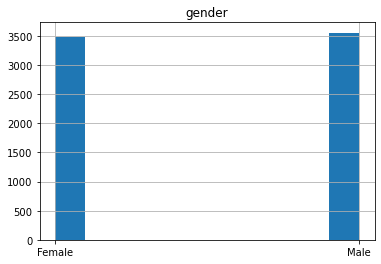

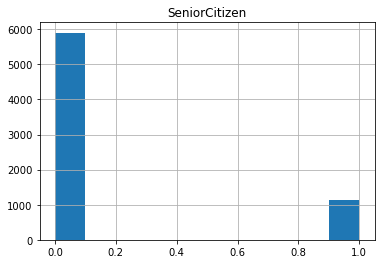

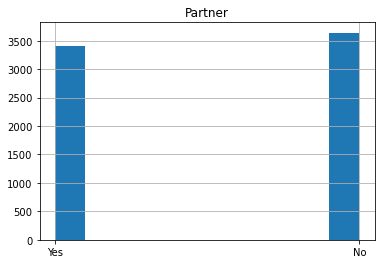

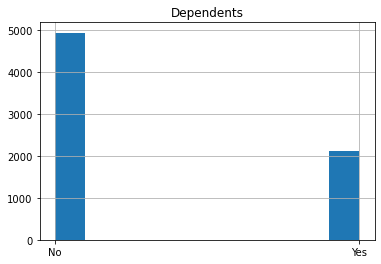

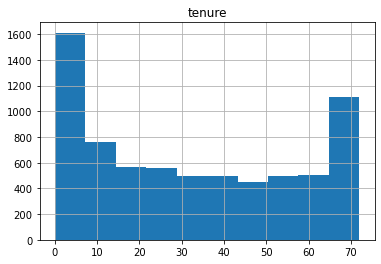

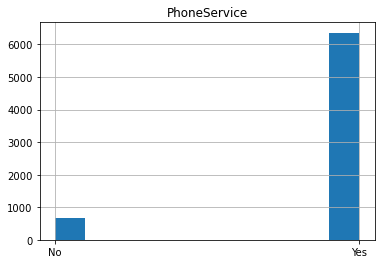

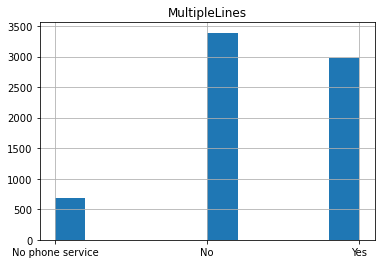

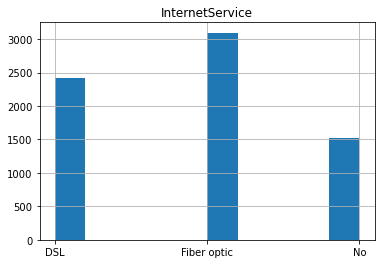

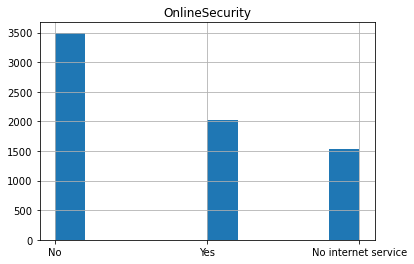

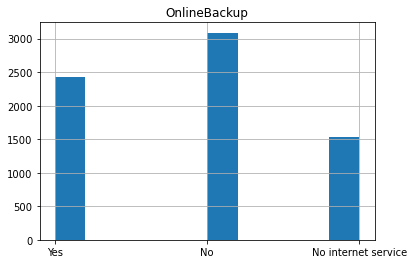

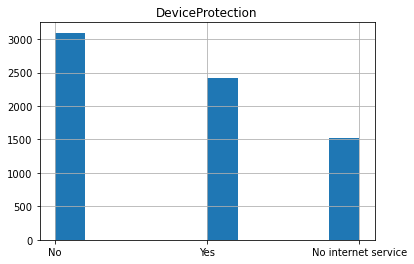

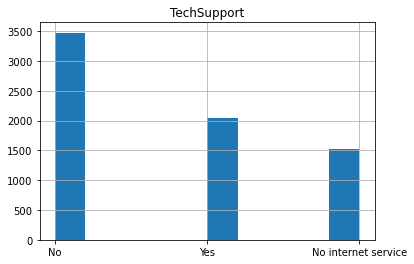

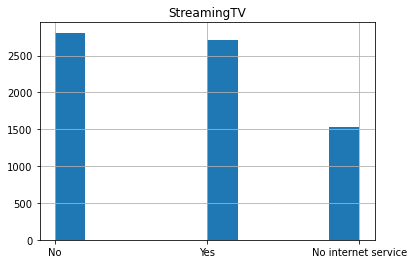

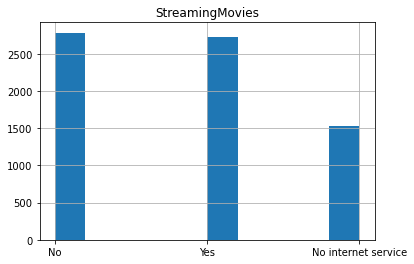

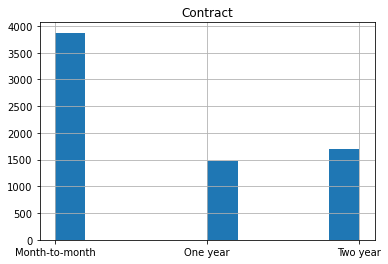

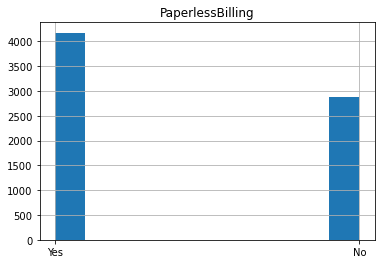

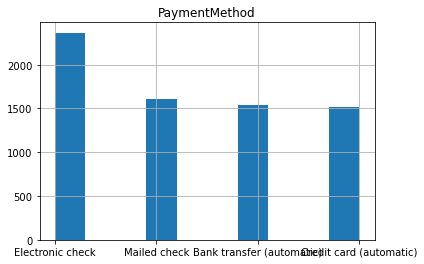

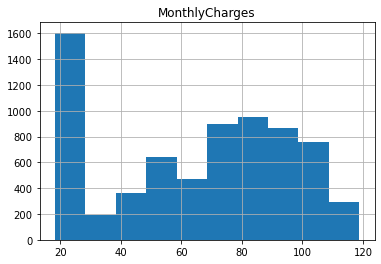

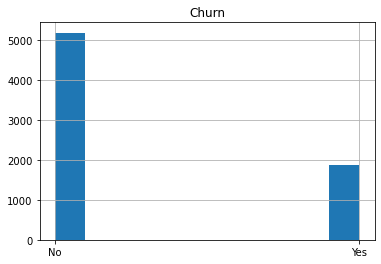

In [5]:
#Perform EDA to uncover general trends and patterns in the data based on visual observation

df_eda = df.drop(columns= ['customerID','TotalCharges'], axis=1)

for col in df_eda.columns:
    df_eda[col].hist()
    plt.title(col)
    plt.show()
    


<AxesSubplot:xlabel='Churn', ylabel='count'>

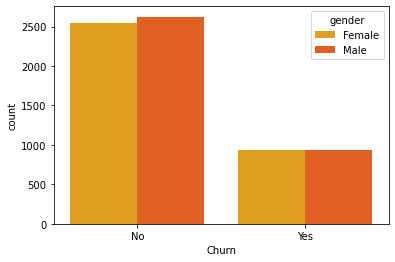

In [6]:

sns.countplot(x='Churn',data=df,hue='gender',palette="autumn_r")

#Observations:
#Gender is not a contributing factor for customer churn as the metrics of both the genders, 
#that have or haven’t churned, are almost the same

#However we do see that overall not-churned population is little higher than churned
#which indicates imbalanced data (more customers tend to stick around than leave)

<AxesSubplot:xlabel='Churn', ylabel='count'>

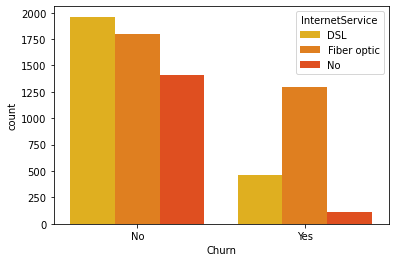

In [7]:

sns.countplot(x='Churn',data=df, hue='InternetService',palette="autumn_r")

#Observations:
#Customers using Fiber-optic have a higher churn percentage. 
#This shows that the company is facing tough competion in that segment

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

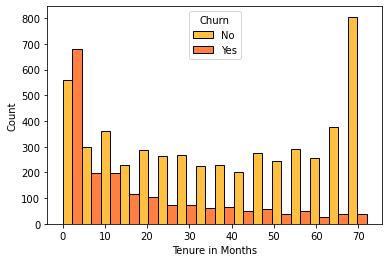

In [8]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge',palette="autumn_r")
ax.set(xlabel="Tenure in Months", ylabel = "Count")
#Observations:
#The churn amount is higher in the initial months and tapers down as an indication of earned brand trust

In [9]:
# checks number of null values detected by .isnull() and string none
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

customerID 0 0
gender 0 0
SeniorCitizen 0 0
Partner 0 0
Dependents 0 0
tenure 0 0
PhoneService 0 0
MultipleLines 0 0
InternetService 0 0
OnlineSecurity 0 0
OnlineBackup 0 0
DeviceProtection 0 0
TechSupport 0 0
StreamingTV 0 0
StreamingMovies 0 0
Contract 0 0
PaperlessBilling 0 0
PaymentMethod 0 0
MonthlyCharges 0 0
TotalCharges 0 11
Churn 0 0


In [10]:
# We can see that there are a few of missing values in the Total charges column.
# Since the missing records compared to a total dataset is low, 
# it would be resonable to remove them from the dataset

df.drop(index=df[df['TotalCharges'] == ' '].index, inplace=True)

# Confirm there are no null rows present after the cleanup
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ']
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

# Check for shape of new dataset, reduced from 7043 to 7032
df.info()



customerID 0 0
gender 0 0
SeniorCitizen 0 0
Partner 0 0
Dependents 0 0
tenure 0 0
PhoneService 0 0
MultipleLines 0 0
InternetService 0 0
OnlineSecurity 0 0
OnlineBackup 0 0
DeviceProtection 0 0
TechSupport 0 0
StreamingTV 0 0
StreamingMovies 0 0
Contract 0 0
PaperlessBilling 0 0
PaymentMethod 0 0
MonthlyCharges 0 0
TotalCharges 0 0
Churn 0 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-

In [11]:
# Convert the categorical data into one-hot encoded variables

df.drop(columns= ['customerID'], axis=1, inplace=True)
df['Churn'] = df['Churn'].replace(['Yes','No'],[1,0])
        
df.head()

df_1 = df[['Churn','tenure','MonthlyCharges','TotalCharges']]

df_cat_columns = df.drop(columns= ['Churn','tenure','MonthlyCharges','TotalCharges'], axis=1)

df_cat_encoded = pd.get_dummies(df_cat_columns,drop_first=True)

df_telco = pd.concat([df_1,df_cat_encoded], axis=1)

df_telco.head()



,Churn,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.5,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,2,53.85,108.15,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [12]:
#Scaling data
X = df_telco.loc[:, df_telco.columns != 'Churn']
y = df_telco [['Churn']]
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


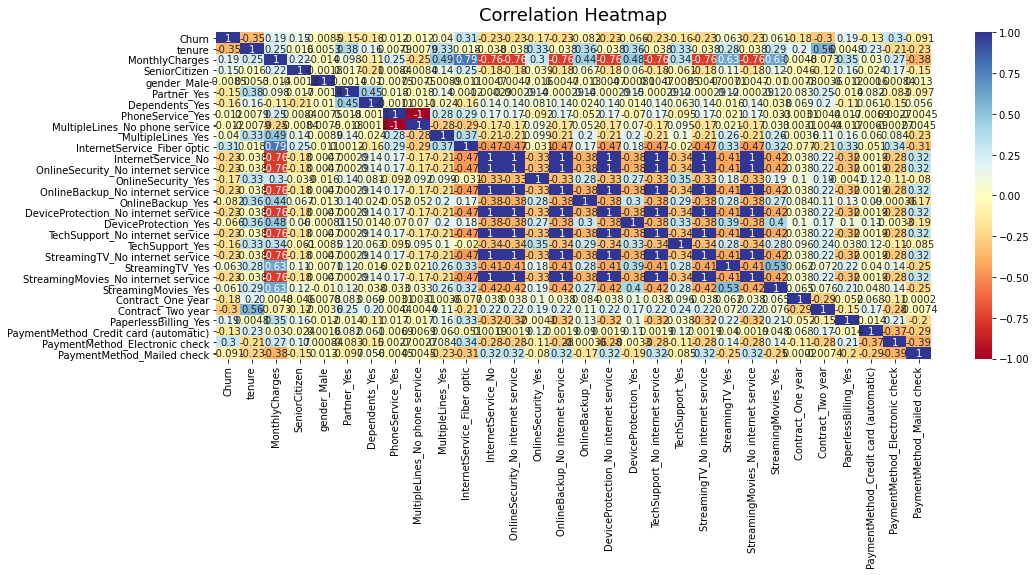

In [13]:
#Checking co-related and dependant data
import seaborn as sb
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(df_telco.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#There is some degree of collinearity exisiting between the attributes, 
#but most of the issue will be taken care by the model regulization

In [14]:
#split the data into 2 datasets; training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


The accuracy is  0.814498933901919
[[951 101]
 [160 195]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.66      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407



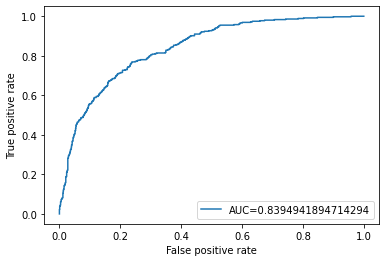

In [15]:
# We are using Logistic Regression with (Ridge) regularization
from sklearn.linear_model import LogisticRegression 
LogReg=LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100)
LogReg.fit(X_train,y_train.values.ravel())
y_pred=LogReg.predict(X_test)
print("The accuracy is ",accuracy_score(y_test,y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

The accuracy is  0.7761194029850746
[[953  99]
 [216 139]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1052
           1       0.58      0.39      0.47       355

    accuracy                           0.78      1407
   macro avg       0.70      0.65      0.66      1407
weighted avg       0.76      0.78      0.76      1407



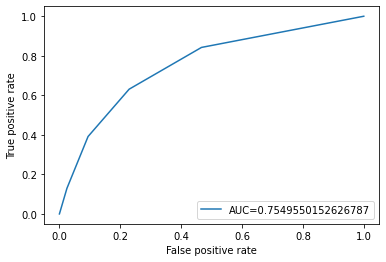

In [16]:
#We are using Non-parametric Models (KNN)

from sklearn.neighbors import KNeighborsClassifier
#clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = KNeighborsClassifier(n_neighbors=4)
#clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_knn.fit(X_train,y_train.values.ravel())
y_pred=clf_knn.predict(X_test)

print("The accuracy is ",accuracy_score(y_test,y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = clf_knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   2.6s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   2.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=700; total time=   2.6s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.3s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.3s
[CV] END max_depth=46, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.3s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000; total time=   3.7s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimato

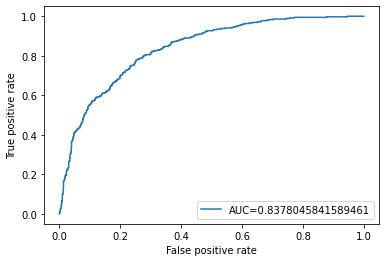

In [17]:
#We are using ensemble method (Random Forest)
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

# Hyper-parameter tuning by finding the best parameters for the Random forest
random_cv=RandomizedSearchCV(clf_rf,param_grid,cv=3,verbose=2,random_state=101)
random_cv.fit(X_train,y_train.values.ravel())

best_random=random_cv.best_estimator_
y_pred=best_random.predict(X_test)

print("The accuracy is ",accuracy_score(y_test,y_pred))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = best_random.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend(loc=4)
plt.show()

In [18]:
#Performace Summary based on the consolidated output from above cells

#************************************************************
##Logistic Regression
#              precision    recall  f1-score   support

#           0       0.86      0.90      0.88      1052
#           1       0.66      0.55      0.60       355

#    accuracy                           0.81      1407
#   macro avg       0.76      0.73      0.74      1407
#weighted avg       0.81      0.81      0.81      1407
#AUC: 0.8394
#************************************************************

##KNN
#              precision    recall  f1-score   support
#
#           0       0.82      0.91      0.86      1052
#           1       0.58      0.39      0.47       355

#    accuracy                           0.78      1407
#   macro avg       0.70      0.65      0.66      1407
#weighted avg       0.76      0.78      0.76      1407
#AUC: 0.7549
#************************************************************

##Random Forest
#              precision    recall  f1-score   support
#
#           0       0.85      0.91      0.88      1052
#           1       0.66      0.51      0.58       355
#
#    accuracy                           0.81      1407
#   macro avg       0.75      0.71      0.73      1407
#weighted avg       0.80      0.81      0.80      1407
#
#AUC: 0.8354
#************************************************************

#The data is imbalanced (1052/355), hence it would not be advisable to use accuracy alone.
#We will used f1-score and AUC to determine the best fitting model


In [19]:
##Results Analysis and recomendation

#The relatively lowest scoring model is KNN which has accuracy:0.78 , f1-score:0.66  and AUC:0.75
#The better scoring model is Random Forest which has accuracy:0.81 , f1-score:0.73  and AUC:0.8354
#The equivalent scoring model is Logistic Regression has accuracy:0.81 , f1-score:0.74  and AUC:0.8394
#Both are recomended depending upon the nature of the audience, Random Forest is noise and outlier resilient  
#and Logistic regression(with Ridge regularization) provides better explainability alongwith acceptable performance
